In [1]:
%load_ext autoreload
%autoreload 2

In [40]:
import requests
import geopandas as gpd
import pandas as pd

import sys
sys.path.insert(0, '../99_utils')
import utils
import objects

# Peru ADM-3 data

In [33]:
url = objects.PERU_ADM3_GEOJSON

'https://data.humdata.org/dataset/54fc7f4d-f4c0-4892-91f6-2fe7c1ecf363/resource/63cc642a-2957-4f25-8a17-086c99d275e8/download/per_adm_ign_20200714_shp.zip'

In [34]:
gdf = gpd.read_file(url, layer='per_admbnda_adm3_ign_20200714')

In [38]:
len(gdf)

1873

<Axes: >

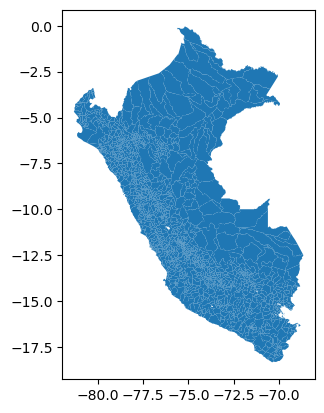

In [37]:
gdf.plot()

In [39]:
gdf.head()

,Shape_Leng,Shape_Area,ADM3_ES,ADM3_PCODE,ADM3_REF,ADM3ALT1ES,ADM3ALT2ES,ADM2_ES,ADM2_PCODE,ADM1_ES,ADM1_PCODE,ADM0_EN,ADM0_ES,ADM0_PCODE,date,validOn,validTo,geometry
0,0.820572,0.023937,Abancay,PE030101,None,None,None,Abancay,PE0301,Apurimac,PE03,Peru,Perú (el),PE,2015-07-24,2020-07-14,NaT,"POLYGON ((-72.93158 -13.55616, -72.9314 -13.55..."
1,0.137948,0.000983,Abelardo Pardo Lezameta,PE020502,None,None,None,Bolognesi,PE0205,Ancash,PE02,Peru,Perú (el),PE,2015-07-24,2020-07-14,NaT,"POLYGON ((-77.1474 -10.29675, -77.14643 -10.29..."
2,1.687027,0.097424,Acari,PE040302,None,None,None,Caraveli,PE0403,Arequipa,PE04,Peru,Perú (el),PE,2015-07-24,2020-07-14,NaT,"POLYGON ((-74.61542 -15.13728, -74.61174 -15.1..."
3,0.726321,0.021049,Acas,PE021402,None,None,None,Ocros,PE0214,Ancash,PE02,Peru,Perú (el),PE,2015-07-24,2020-07-14,NaT,"POLYGON ((-77.26312 -10.43537, -77.26356 -10.4..."
4,0.824658,0.019976,Accha,PE081002,None,None,None,Paruro,PE0810,Cusco,PE08,Peru,Perú (el),PE,2015-07-24,2020-07-14,NaT,"POLYGON ((-71.80912 -13.92427, -71.80901 -13.9..."


# ERA 5

In [113]:
import cdsapi

In [115]:
# This was copied from the ERA5 download tool: https://cds.climate.copernicus.eu/datasets/reanalysis-era5-single-levels?tab=download
dataset = "reanalysis-era5-single-levels"
request = {
    "product_type": ["reanalysis"],
    "variable": ["2m_temperature"],
    "year": ["2022", "2023", "2024"],
    "month": [
        "01", "02", "03",
        "04", "05", "06",
        "07", "08", "09",
        "10", "11", "12"
    ],
    "day": [
        "01", "02", "03",
        "04", "05", "06",
        "07", "08", "09",
        "10", "11", "12",
        "13", "14", "15",
        "16", "17", "18",
        "19", "20", "21",
        "22", "23", "24",
        "25", "26", "27",
        "28", "29", "30",
        "31"
    ],
    "time": ["00:00", "12:00"],
    "data_format": "grib",
    "download_format": "unarchived",
    "area": [-0.03860596799995619, -81.32823048999995, -18.35092773599996, -68.65227910299996]
}

In [117]:
client = cdsapi.Client()

2025-10-01 23:26:40,215 INFO [2025-09-03T00:00:00] To improve our C3S service, we need to hear from you! Please complete this very short [survey](https://confluence.ecmwf.int/x/E7uBEQ/). Thank you.
2025-10-01 23:26:40,218 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.


In [119]:
x = client.retrieve(dataset, request).download()

2025-10-01 23:27:35,102 INFO Request ID is 1ef262af-3994-42e0-ab07-eb6bf1fd31a6
2025-10-01 23:27:35,305 INFO status has been updated to accepted
2025-10-01 23:27:49,628 INFO status has been updated to running
2025-10-01 23:31:57,444 INFO status has been updated to successful


269c15be7865b6c32e03872748bb00d7.grib:   0%|          | 0.00/16.0M [00:00<?, ?B/s]

In [121]:
pwd

'/home/luise/repos/climate-impacts/code/88_exploration'

In [53]:
df = pd.read_csv(path, delimiter=',')

ParserError: Error tokenizing data. C error: Expected 32 fields in line 1216326, saw 34


In [48]:
import csv

In [98]:
with open(path, 'r', newline='') as file:
    reader = csv.reader(file)
    i = 0
    
    for row in reader:
        if i == 24896:
            print("This is the line.")
            print(row)
            break
    
        i += 1
        

This is the line.
['24896', 'SIS', 'FEMENINO', 'AÑOS', '87', 'SOLTERO', 'PRIMARIA COMPLETA', 'MESTIZO', '92-33-14-01-15-000', 'PERU', 'LIMA', 'LIMA', 'MIRAFLORES', '2017-10-18', '2017', '10', 'EESS', 'MINSA', 'SIN REGISTRO', 'NO SE REALIZÓ NECROPSIA', 'SHOCK SEPTICO', 'A418', 'INSUFICIENCIA RESPIRATORIA', 'J960', 'NEUMONIA INTRAHOSPITALARIA', 'J159', 'EPID', 'SIN REGISTRO', 'SIN REGISTRO', 'SIN REGISTRO', 'SIN REGISTRO', 'SIN REGISTRO']


In [96]:
with open(path, 'r', newline='') as file:
    reader = csv.reader(file)
    i = 0
    
    for row in reader:
        if i == 0:
            print("This is the line.")
            print(row)
            break
    
        i += 1
        

This is the line.
['N', 'TIPO_SEGURO', 'SEXO', 'TIEMPO_EDAD', 'EDAD', 'ESTADO_CIVIL', 'NIVEL_DE_INSTRUCCION', 'ETNIA', 'COD_UBIGEO_DOMICILIO', 'PAIS_DOMICILIO', 'DEPARTAMENTO_DOMICILIO', 'PROVINCIA_DOMICILIO', 'DISTRITO_DOMICILIO', 'FECHA', 'ANIO', 'MES', 'TIPO_LUGAR', 'INSTITUCION', 'MUERTE_VIOLENTA', 'NECROPSIA', 'DEBIDO_CAUSA_A', 'CAUSA_A_CIEX', 'DEBIDO_CAUSA_B', 'CAUSA_B_CIEX', 'DEBIDO_CAUSA_C', 'CAUSA_C_CIEX', 'DEBIDO_CAUSA_D', 'CAUSA_D_CIEX', 'DEBIDO_CAUSA_E', 'CAUSA_E_CIEX', 'DEBIDO_CAUSA_F', 'CAUSA_F_CIEX']


In [55]:
count_csv_rows_csv_module(path)

Error: line contains NUL